## Table of Contents:
#### 01. Importing the libraries and data
#### 02. Cleaning the data
#### 03. Preparing the data for regression analysis
#### 04. Conducting Regression Analysis
#### 05. Comparing how the regression fits the training set

## 01. Importing the libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining the path

path=r'/Users/sanju/Documents/Apartment Rental Analysis in Berlin '

In [4]:
# importing the dataset

df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','immo_data_berlin_cleaned2.csv'),index_col=0)

In [5]:
df.head()

,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,...,street,lift,typeOfFlat,noRooms,floor,garden,city,locality_district,Rent category,district
0,Berlin,320.00,central_heating,ONE_YEAR_FREE,False,True,32.288282,1140.00,1965.513365,district_heating,...,Metropolitan_Park,True,ground_floor,3.0,0.0,False,Berlin,Staaken_Spandau,Medium rent,Spandau
1,Berlin,79.00,central_heating,ONE_YEAR_FREE,False,False,40.000000,955.00,1918.000000,gas,...,Börnestraße,False,ground_floor,2.0,0.0,False,Berlin,Weißensee_Weißensee,Medium rent,Pankow
2,Berlin,150.00,floor_heating,ONE_YEAR_FREE,True,True,40.000000,1300.00,2019.000000,district_heating,...,Stallschreiberstraße,True,apartment,2.0,3.0,False,Berlin,Mitte_Mitte,Medium rent,Mitte
3,Berlin,228.78,floor_heating,ONE_YEAR_FREE,False,True,32.288282,1428.78,2017.000000,district_heating,...,Hallesche_Straße,True,apartment,2.5,6.0,False,Berlin,Kreuzberg_Kreuzberg,Medium rent,Friedrichshain-Kreuzberg
4,Berlin,147.08,district_heating,ONE_YEAR_FREE,True,True,40.000000,1559.05,2019.000000,district_heating,...,Heidestraße,True,ground_floor,2.0,0.0,False,Berlin,Tiergarten_Tiergarten,Medium rent,Mitte


## 02. Cleaning the data

In [6]:
# checking for missing values

df.isnull().sum()

state                 0
serviceCharge         0
heatingType           0
telekomTvOffer        0
newlyConst            0
balcony               0
telekomUploadSpeed    0
totalRent             0
yearConstructed       0
firingTypes           0
hasKitchen            0
cellar                0
baseRent              0
livingSpace           0
condition             0
street                0
lift                  0
typeOfFlat            0
noRooms               0
floor                 0
garden                0
city                  0
locality_district     0
Rent category         0
district              0
dtype: int64

there are no missing values to handle

/var/folders/ss/mvg6mpls2xs7mgfvn6l_why00000gn/T/ipykernel_94111/57115418.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totalRent'], bins=25) # Shows extreme values


<Axes: xlabel='totalRent', ylabel='Density'>

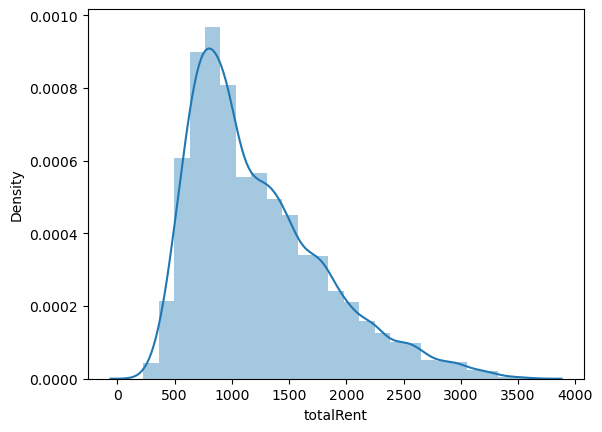

In [7]:
# checking for the extreme values

sns.distplot(df['totalRent'], bins=25) # Shows extreme values

In [8]:
# checking the mean, median, min and max value of 'totalRent'

df['totalRent'].describe()

count    8959.000000
mean     1229.335717
std       590.086989
min       226.750000
25%       779.000000
50%      1079.000000
75%      1555.010000
max      3593.170000
Name: totalRent, dtype: float64

## Hypothesis: As the living space of a rental increases, the total rent also increases.

## 03.  Preparing the data for regression analysis

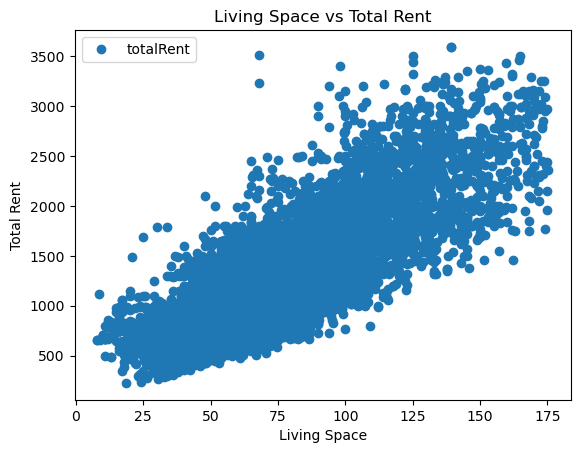

<Figure size 640x480 with 0 Axes>

In [31]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living Space vs Total Rent')  
plt.xlabel('Living Space')  
plt.ylabel('Total Rent')  
plt.show()

In [11]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['livingSpace'].values.reshape(-1,1)
y = df['totalRent'].values.reshape(-1,1)

In [12]:
X

array([[77.  ],
       [62.63],
       [46.4 ],
       ...,
       [95.  ],
       [28.45],
       [72.64]])

In [13]:
y

array([[1140.  ],
       [ 955.  ],
       [1300.  ],
       ...,
       [ 949.  ],
       [ 919.  ],
       [ 828.77]])

In [14]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Conducting Regression Analysis

In [15]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

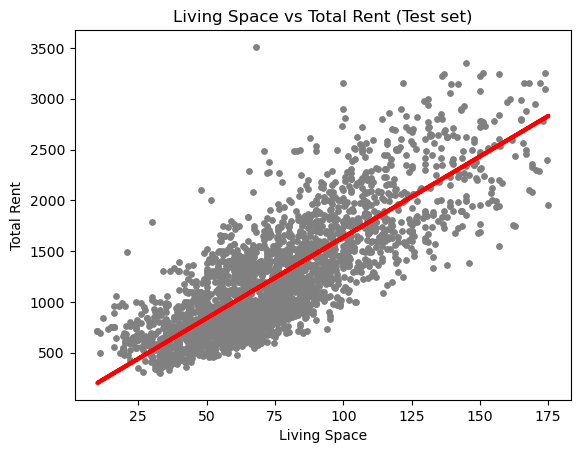

<Figure size 640x480 with 0 Axes>

In [30]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Test set)')
plot_test.xlabel('Living Space')
plot_test.ylabel('Total Rent')
plot_test.show()

Till the living space is 100m2, the data points are quite close to the regression line. But once the living space is more than 100m2, there are many data points which are little far from the regression line and are quite scattered.

In [19]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [20]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.92572778]]
Mean squared error:  117588.6196743194
R2 score:  0.6416682557686143


In [21]:
y_predicted

array([[1100.24811391],
       [1141.65500615],
       [1332.76373954],
       ...,
       [1184.17669933],
       [2224.60449539],
       [1716.25526456]])

In [22]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1465.80,1100.248114
1,810.00,1141.655006
2,919.00,1332.763740
3,1550.00,1635.352567
4,874.29,1374.170632
5,699.00,918.694817
6,1485.00,1537.409342
7,1153.39,775.363267
8,1775.60,1721.351497
9,440.00,616.105989


The MSE value (117588.6196743194) seems to be quite high to me. And the R2 score is also 0.64 which is ok but not the best. Also, if we compare the actual values with the predicted values, there is quite a difference. So I think this model is not the best fit for predicting the value of y (total rent of the rental).

## 05. Comparing how the regression fits the training set 

In [23]:
# predicting X_train

y_predicted_train = regression.predict(X_train) 

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[15.92572778]]
Mean squared error:  120040.22482078164
R2 score:  0.6635078370380272


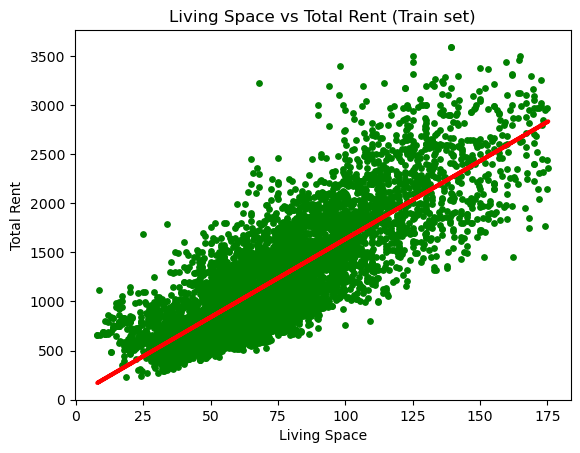

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Space vs Total Rent (Train set)')
plot_test.xlabel('Living Space')
plot_test.ylabel('Total Rent')
plot_test.show()